## Exploration

train.csv shape is  (139753, 9)
test.csv shape is  (17470, 2)

        Id   ProductId          UserId  HelpfulnessNumerator  \
0   195370  1890228583  A3VLX5Z090RQ0V                     1   
1  1632470  B00BEIYSL4   AUDXDMFM49NGY                     0   
2     9771  0767809335  A3LFIA97BUU5IE                     3   
3   218855  6300215792  A1QZM75342ZQVQ                     1   
4   936225  B000B5XOZW   ANM2SCEUL3WL1                     1   

   HelpfulnessDenominator        Time  \
0                       2  1030838400   
1                       1  1405036800   
2                      36   983750400   
3                       1  1394841600   
4                       1  1163721600   

                                             Summary  \
0                        An Unexplained Anime Review   
1                                         not great.   
2                    Technical problem with this DVD   
3                          Heeeeyyyyy LAAAAADEEE!!!!   
4  Herzog the Great Trave

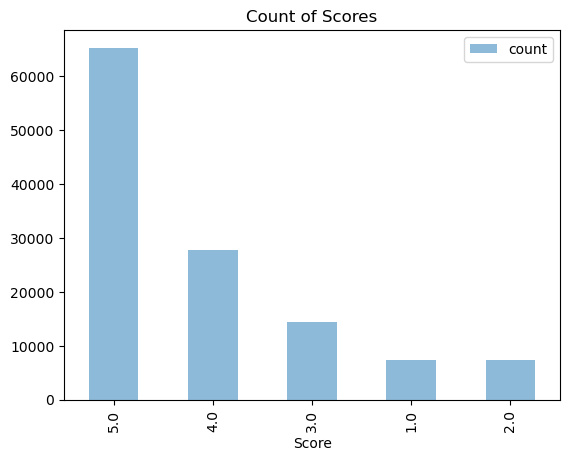

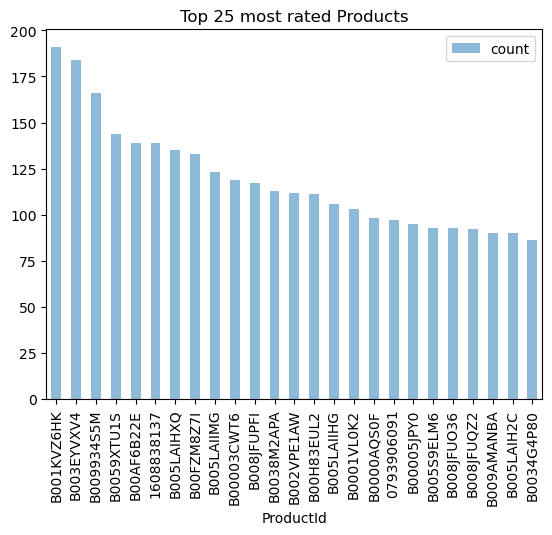

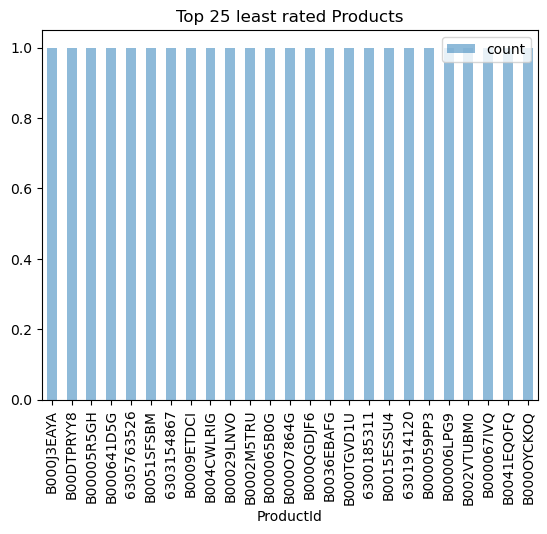

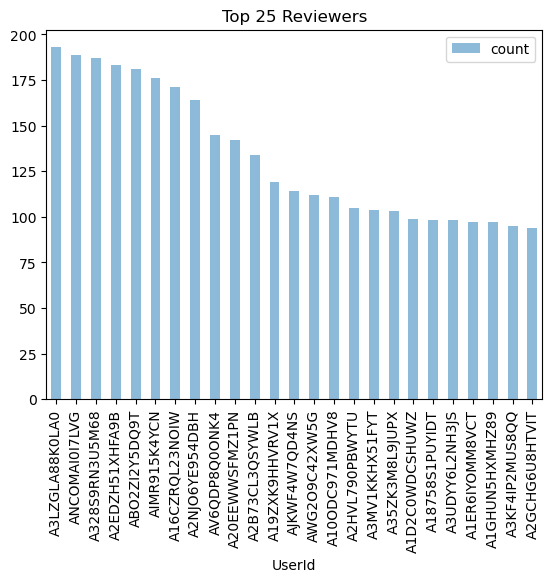

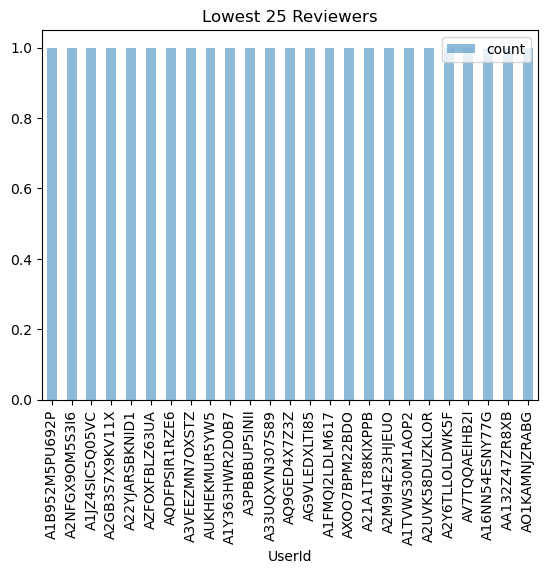

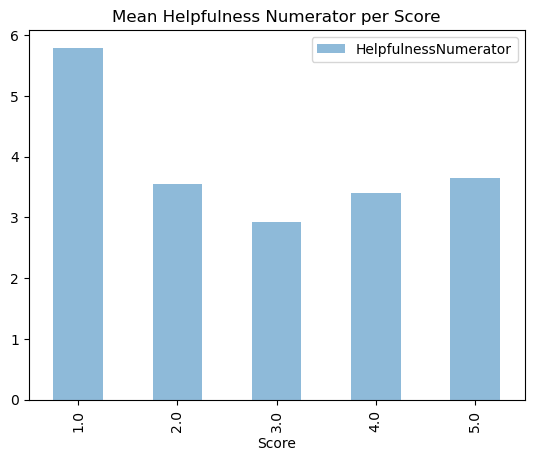

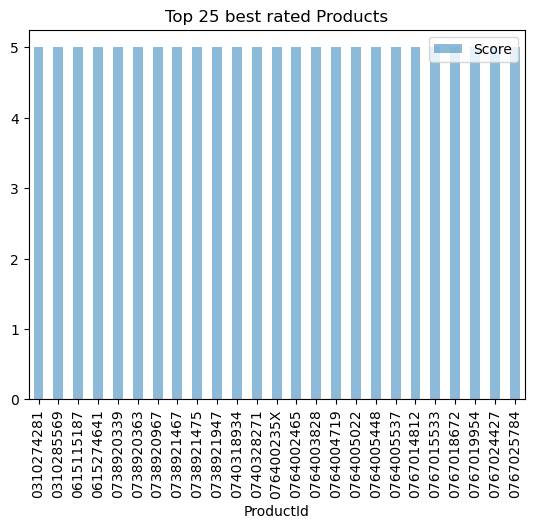

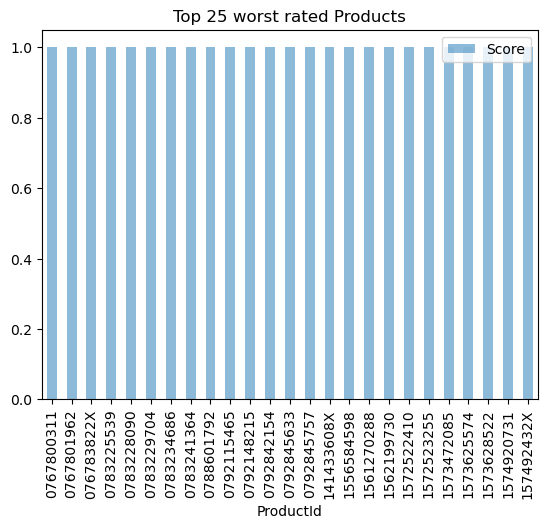

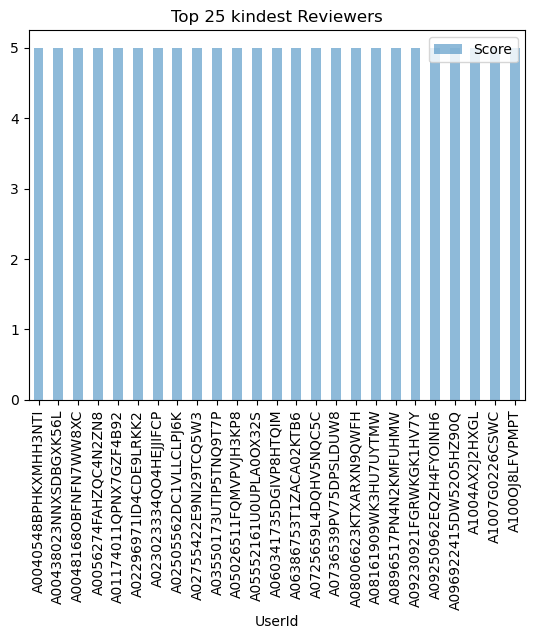

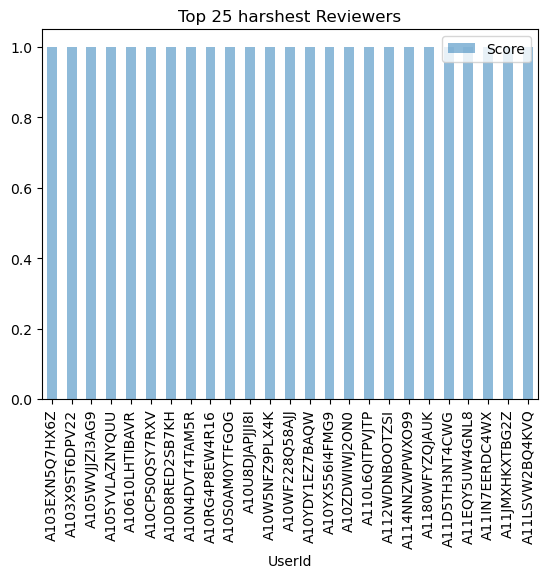

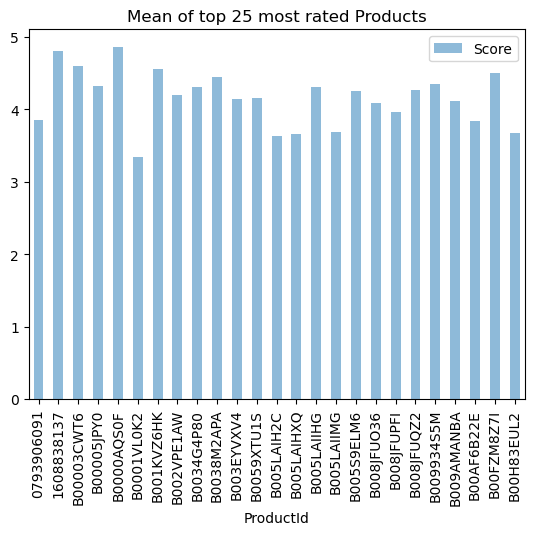

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

trainingSet = pd.read_csv("./data/train.csv")
testingSet = pd.read_csv("./data/test.csv")

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())

trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("Count of Scores")
plt.show()

trainingSet['ProductId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 most rated Products")
plt.show()

trainingSet['ProductId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 least rated Products")
plt.show()

trainingSet['UserId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 Reviewers")
plt.show()

trainingSet['UserId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Lowest 25 Reviewers")
plt.show()

trainingSet[['Score', 'HelpfulnessNumerator']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean Helpfulness Numerator per Score")
plt.show()

trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nlargest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 best rated Products")
plt.show()

trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nsmallest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 worst rated Products")
plt.show()

trainingSet[['Score', 'UserId']].groupby('UserId').mean().nlargest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 kindest Reviewers")
plt.show()

trainingSet[['Score', 'UserId']].groupby('UserId').mean().nsmallest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 harshest Reviewers")
plt.show()

trainingSet[trainingSet['ProductId'].isin(trainingSet['ProductId'].value_counts().nlargest(25).index.tolist())][['Score', 'ProductId']].groupby('ProductId').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean of top 25 most rated Products")
plt.show()

## Feature Extraction

In [7]:
import pandas as pd

def process(df):
    # This is where you can do all your processing

    df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
    df['Helpfulness'] = df['Helpfulness'].fillna(0)

    df['ReviewLength'] = df.apply(lambda row : len(row['Text'].split()) if type(row['Text']) == str else 0, axis = 1)
    df['SummaryLength'] = df.apply(lambda row : len(row['Summary'].split()) if type(row['Summary']) == str else 0, axis = 1)
    df['product_count'] = df.groupby('ProductId')['ProductId'].transform('count')
    
    
    return df

# Load the dataset
trainingSet = pd.read_csv("./data/train.csv")

# Process the DataFrame
train_processed = process(trainingSet)

# Load test set
submissionSet = pd.read_csv("./data/test.csv")

# Merge on Id so that the test set can have feature columns as well
testX= pd.merge(train_processed, submissionSet, left_on='Id', right_on='Id')
testX = testX.drop(columns=['Score_x'])
testX = testX.rename(columns={'Score_y': 'Score'})

# The training set is where the score is not null
trainX =  train_processed[train_processed['Score'].notnull()]

# Save the datasets with the new features for easy access later
testX.to_csv("./data/X_test.csv", index=False)
trainX.to_csv("./data/X_train.csv", index=False)


In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

analyzer = SentimentIntensityAnalyzer()
train_X = pd.read_csv("./data/X_train_stemmed.csv")
test_X = pd.read_csv("./data/X_test_stemmed.csv")
sentences = list(train_X['Text_Stemmed'])

sentiment_scores = [] 
neg_scores = []
pos_scores = []
for sentence in sentences:
    if type(sentence)==str:
        neg_scores.append(analyzer.polarity_scores(sentence)['neg'])
        sentiment_scores.append(analyzer.polarity_scores(sentence)['compound'])
        pos_scores.append(analyzer.polarity_scores(sentence)['pos'])
    else:
        sentiment_scores.append(0)
        neg_scores.append(0)
        pos_scores.append(0)
train_X['sentiment_scores'] = sentiment_scores
train_X['neg_scores'] = neg_scores
train_X['pos_scores'] = pos_scores

# testX['sentiment_scores'] = ss_test
# with open('sentiment_scores_train.obj', 'wb') as f:
#         pickle.dump(sentiment_scores, f)


In [6]:
sentences = list(test_X['Text_Stemmed'])
sentiment_scores = [] 
neg_scores = []
pos_scores = []
for sentence in sentences:
    if type(sentence)==str:
        neg_scores.append(analyzer.polarity_scores(sentence)['neg'])
        sentiment_scores.append(analyzer.polarity_scores(sentence)['compound'])
        pos_scores.append(analyzer.polarity_scores(sentence)['pos'])
    else:
        sentiment_scores.append(0)
        neg_scores.append(0)
        pos_scores.append(0)
test_X['sentiment_scores'] = sentiment_scores
test_X['neg_scores'] = neg_scores
test_X['pos_scores'] = pos_scores

In [ ]:
test_X.to_csv("./data/X_test_stemmed.csv", index=False)
train_X.to_csv("./data/X_train_stemmed.csv", index=False)

In [44]:
testX.to_csv("./data/X_test.csv", index=False)
trainX.to_csv("./data/X_train.csv", index=False)

C:\Users\Minhm\AppData\Local\Temp\ipykernel_13844\2139581045.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainX['sentiment_scores'] = ss_train


## Visualization

In [12]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
X_train = pd.read_csv('./data/X_train_stemmed.csv')
# X_test = pd.read_csv('./data/X_test_stemmed.csv')
vectorizer_sum = TfidfVectorizer()
X_train['Summary_Stemmed'] = X_train['Summary_Stemmed'].fillna('')
text_summary = vectorizer_sum.fit_transform(X_train["Summary_Stemmed"])

svd_tfidf = TruncatedSVD(n_components=2)
matrix_2D_tfidf = svd_tfidf.fit_transform(text_summary)

colors = []
for score in X_train['Score']:
    if score == 1:
        colors.append('green')
    elif score == 2:
        colors.append('blue')
    elif score ==3:
        colors.append('red')
    elif score ==4:
        colors.append('orange')
    elif score ==5:
        colors.append('purple')



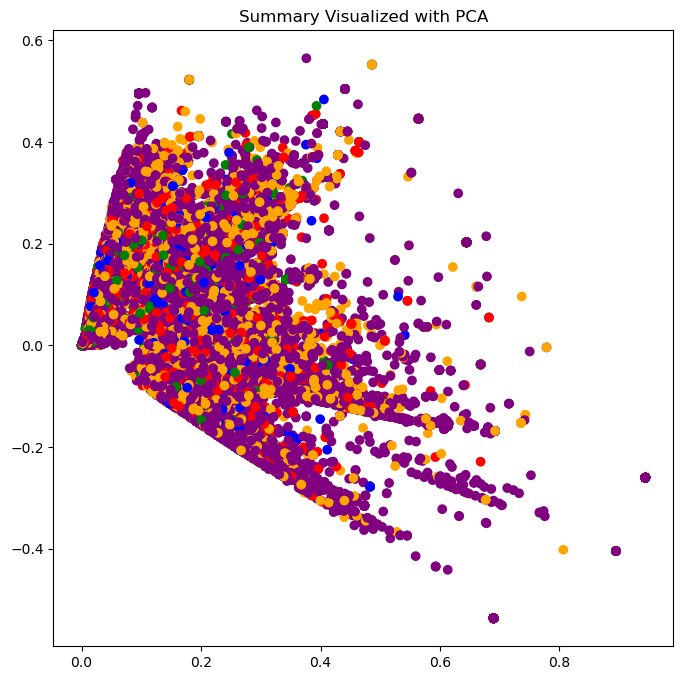

In [14]:
plt_1 = plt.figure(figsize=(8, 8))
plt.scatter(matrix_2D_tfidf[:, 0], matrix_2D_tfidf[:, 1],color=colors)
plt.title('Summary Visualized with PCA')
plt.show()

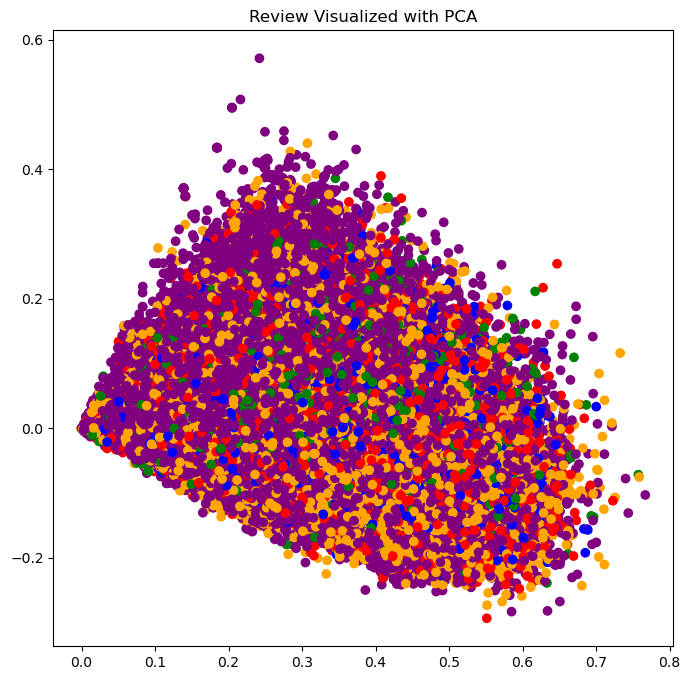

In [16]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
X_train = pd.read_csv('./data/X_train_stemmed.csv')
# X_test = pd.read_csv('./data/X_test_stemmed.csv')
vectorizer = TfidfVectorizer()
X_train['Text_Stemmed'] = X_train['Text_Stemmed'].fillna('')
text_summary = vectorizer.fit_transform(X_train["Text_Stemmed"])

svd_tfidf = TruncatedSVD(n_components=2)
matrix_2D_tfidf = svd_tfidf.fit_transform(text_summary)

plt_1 = plt.figure(figsize=(8, 8))
plt.scatter(matrix_2D_tfidf[:, 0], matrix_2D_tfidf[:, 1],color=colors)
plt.title('Review Visualized with PCA')
plt.show()

## Creating your model

Accuracy on testing set =  0.5321055902652841
RMSE on testing set =  1.2339181717180807


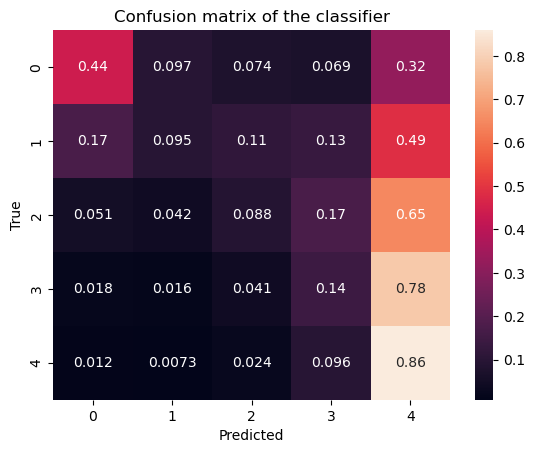

In [46]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Load training set with new features into DataFrame
X_train = pd.read_csv("./data/X_train.csv")

# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
        X_train.drop(['Score'], axis=1),
        X_train['Score'],
        test_size=1/4.0,
        random_state=0
    )

# This is where you can do more feature selection
X_train_processed = X_train.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary'])
# X_train_processed = X_train[['Helpfulness','ReviewLength','HelpfulnessDenominator','sentiment_scores']]
X_test_processed = X_test.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary'])
# X_test_processed = X_test[['Helpfulness','ReviewLength','HelpfulnessDenominator','sentiment_scores']]
# Learn the model
# model = KNeighborsClassifier(n_neighbors=20).fit(X_train_processed, Y_train)
# model = DecisionTreeClassifier(class_weight='balanced').fit(X_train_processed, Y_train)
model = RandomForestClassifier(n_estimators=50, max_samples=None)
model.fit(X_train_processed, Y_train)

# pickle model - saves it so you can load it later
with open('knn_20_model.obj', 'wb') as f:
        pickle.dump(model, f)
# to load pickled model: 
# with open('filename', 'rb') as f:
#    model = pickle.load(f)

# Evaluate your model on the testing set
Y_test_predictions = model.predict(X_test_processed)
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions)**0.5)

# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Create the Kaggle submission

In [47]:
X_submission = pd.read_csv("./data/X_test.csv")
X_submission_processed = X_submission.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary', 'Score'])

X_submission['Score'] = model.predict(X_submission_processed)
submission = X_submission[['Id', 'Score']]
submission.to_csv("./data/submission.csv", index=False)

Now you can upload the `submission.csv` to kaggle